In [19]:
# FUNDMENTAL SETTING
# internal packages
from time import time
import multiprocessing as mp
from multiprocessing import Pool, Process, Queue, Manager

# numpy, matplotlib, scipy packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import scipy.special as special
from scipy.special import expn
from scipy.special import wofz
from scipy import integrate, interpolate

# additional packages
import corner
from fisspy.read import FISS
import fisspy.cm as fisscmap

# local packages
import sub4
from sub4 import fissDB

%config InlineBackend.figure_format='retina'
#%matplotlib inline

plt.rcParams['font.size'] = 15
plt.rc('legend', fontsize=12)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
#plt.rcParams['text.usetex'] = True

plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True

# Radiative Flux Analysis

# AR - 2013.07.17 18:52:21

In [10]:
# LOAD FLUX RESULTS
flux_path = '/data/home/sskang/Documents/Data/FISS_20130717_AR_/flux'

flux_Ha = '/FR_20130717_185221_Ha.npy'
flux_Ca = '/FR_20130717_185222_Ca.npy'

flux_Ha, flux_Ca = flux_path + flux_Ha, flux_path + flux_Ca

flux_Ha = np.load(flux_Ha)
flux_Ca = np.load(flux_Ca)

In [11]:
print(flux_Ha.shape, flux_Ca.shape)

(3, 250, 250) (3, 250, 250)


In [27]:
# import a FISS file and its corresponding parameters file.
db = None
Initialized = False

# Active Region
fiss_path = '/data/home/sskang/Documents/Data/FISS_20130717_AR_/fiss_data'
pars_path = '/data/home/sskang/Documents/Data/FISS_20130717_AR_/pars'

fHa = '/FISS_20130717_185221_A1_c.fts'
fCa = '/FISS_20130717_185222_B1_c.fts'
fHapars = '/FISS_20130717_185221_A1_par.fts'
fCapars = '/FISS_20130717_185222_B1_par.fts'

fHa, fCa = fiss_path + fHa, fiss_path + fCa
fHapars, fCapars = pars_path + fHapars, pars_path + fCapars

print(fHa)
print(fHapars)

if (db is None) and not Initialized:
    fissHa = FISS(fHa, absScale=False)   # 6562.82
    fissCa = FISS(fCa, absScale=False)   # 8542.09
    
    fissHa.data = np.flip(fissHa.data,1)
    fissCa.data = np.flip(fissCa.data,1)
    
    icont = fissHa.data[:,:,50]
    qs = icont > (icont.max()*0.7)
    fissHa.refProfile = fissHa.data[qs,:].mean(0)
    icont = fissCa.data[:,:, 50]
    qs = icont > (icont.max()*0.7)
    fissCa.refProfile = fissCa.data[qs,:].mean(0)
    
    del icont, qs
    Initialized = True

Fitted = True
if Fitted:
    db = fissDB(fissHa, fissCa, Aparfile=fHapars, Bparfile=fCapars)
else:
    db = fissDB(fissHa, fissCa)

/data/home/sskang/Documents/Data/FISS_20130717_AR_/fiss_data/FISS_20130717_185221_A1_c.fts
/data/home/sskang/Documents/Data/FISS_20130717_AR_/pars/FISS_20130717_185221_A1_par.fts


In [29]:
print(db.fissHa.data.shape, db.fissCa.data.shape)
print(db.parHa.shape, db.parCa.shape)

(250, 250, 512) (250, 250, 502)
(17, 250, 250) (17, 250, 250)


## Ha line

### flux histogram

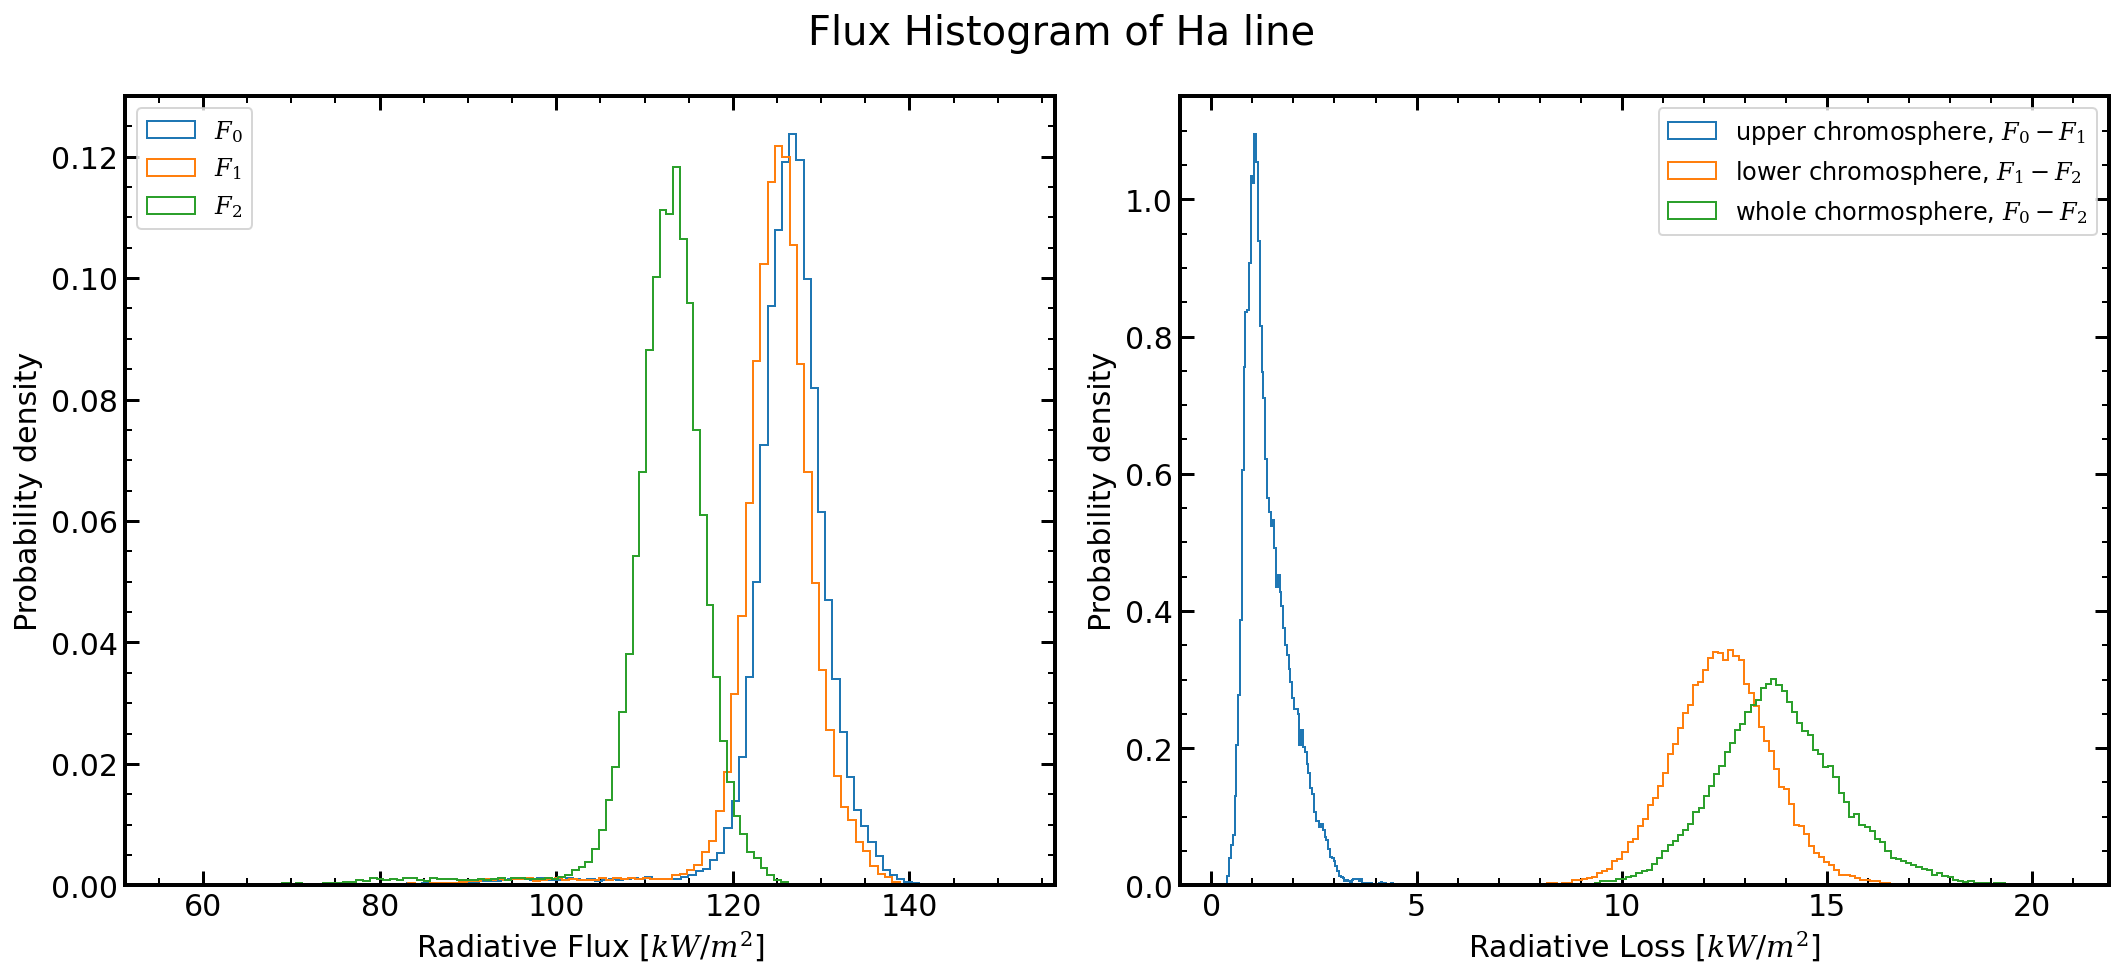

In [12]:
flux_hist_plot(flux_Ha, line='Ha')

### flux map

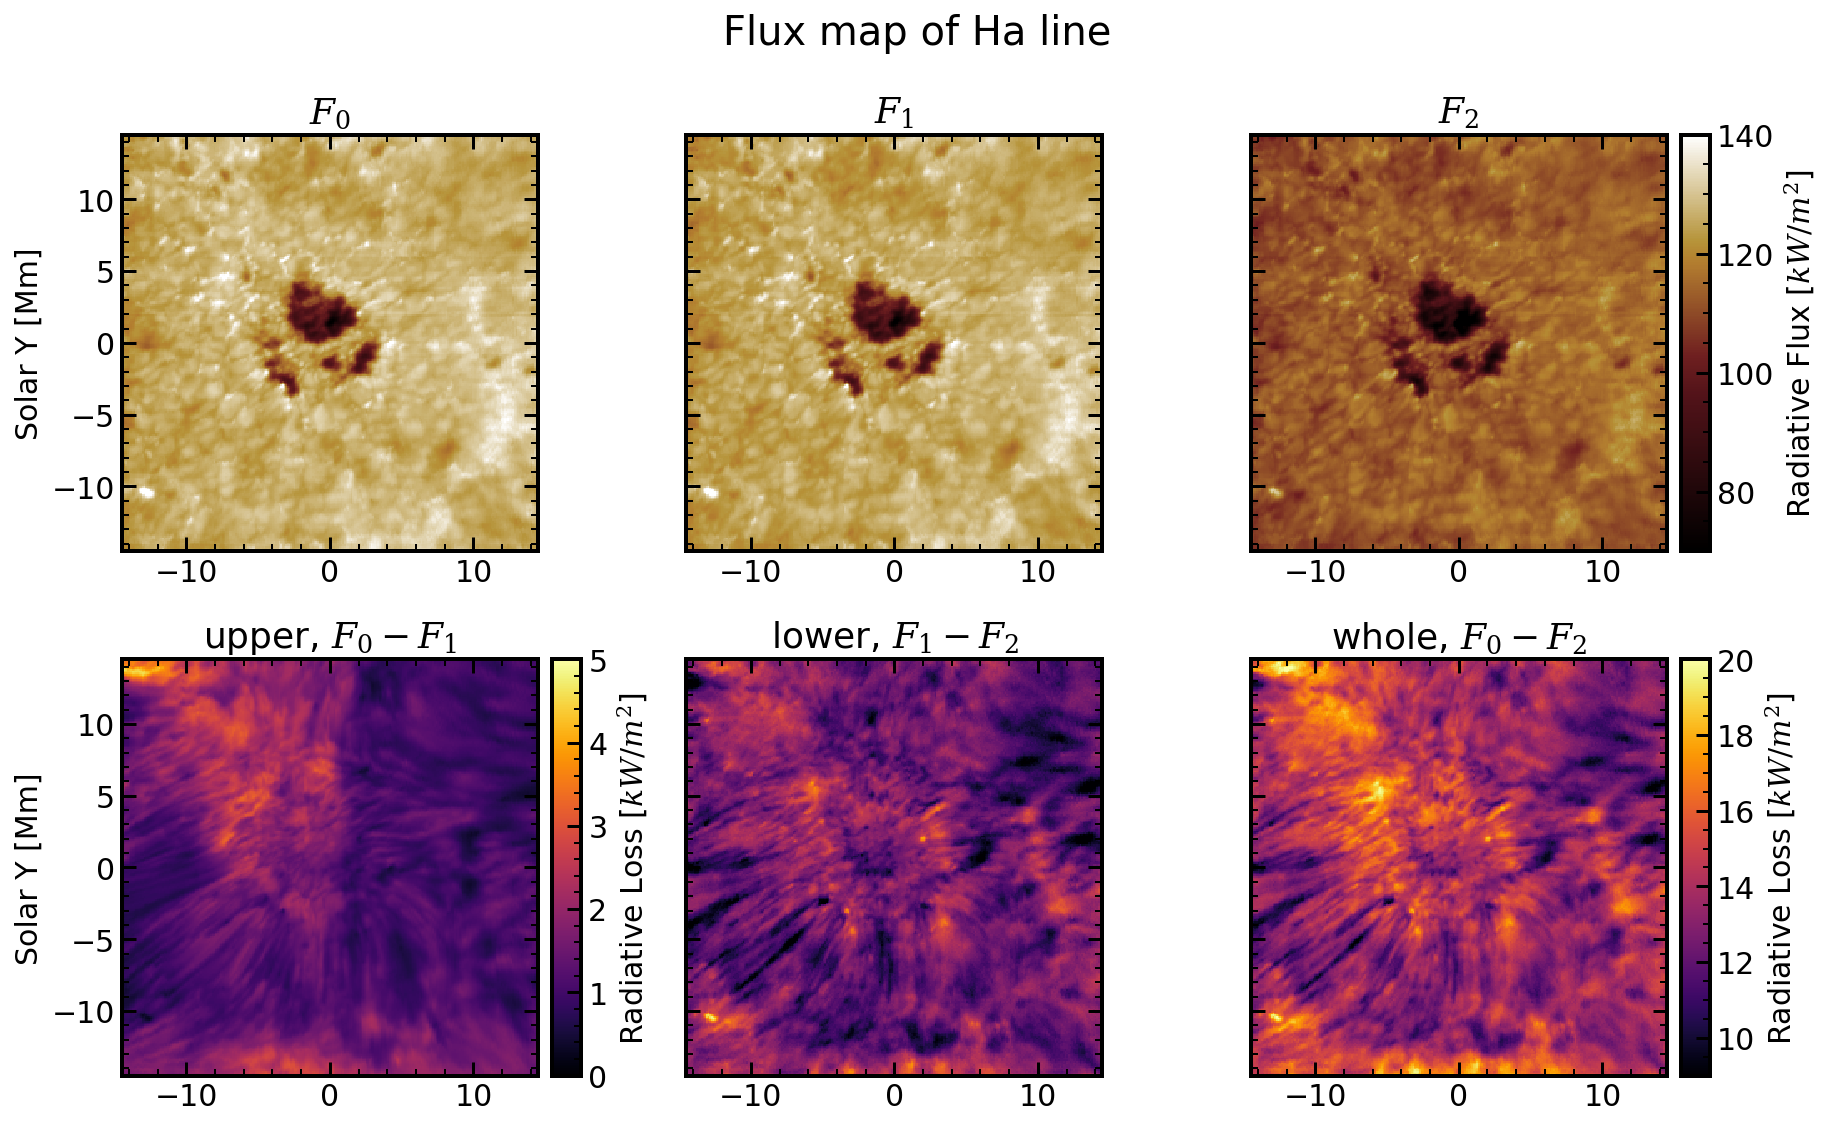

In [25]:
flux_map_plot(flux_Ha, line='Ha', which='both')

### inversion histogram

### inversion map

## Ca II line

### histogram

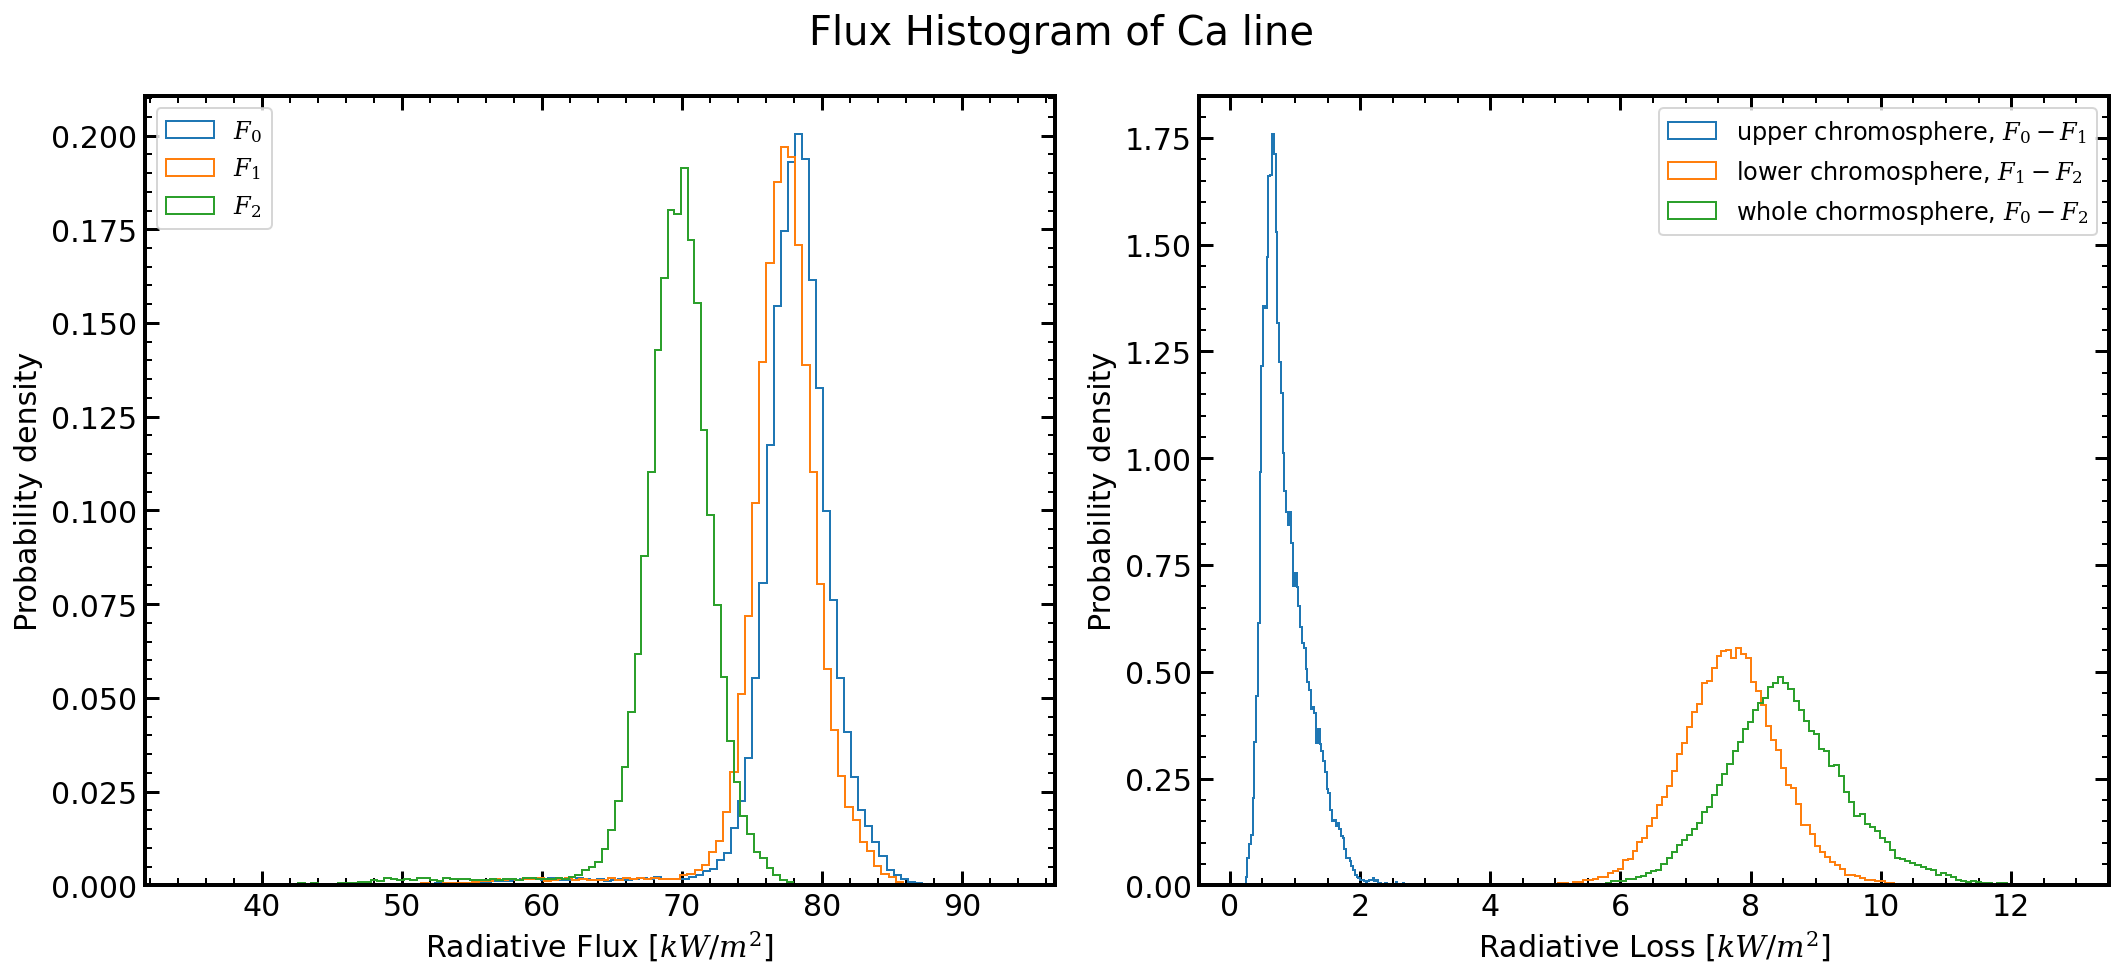

In [23]:
flux_hist_plot(flux_Ca, line='Ca')

### map

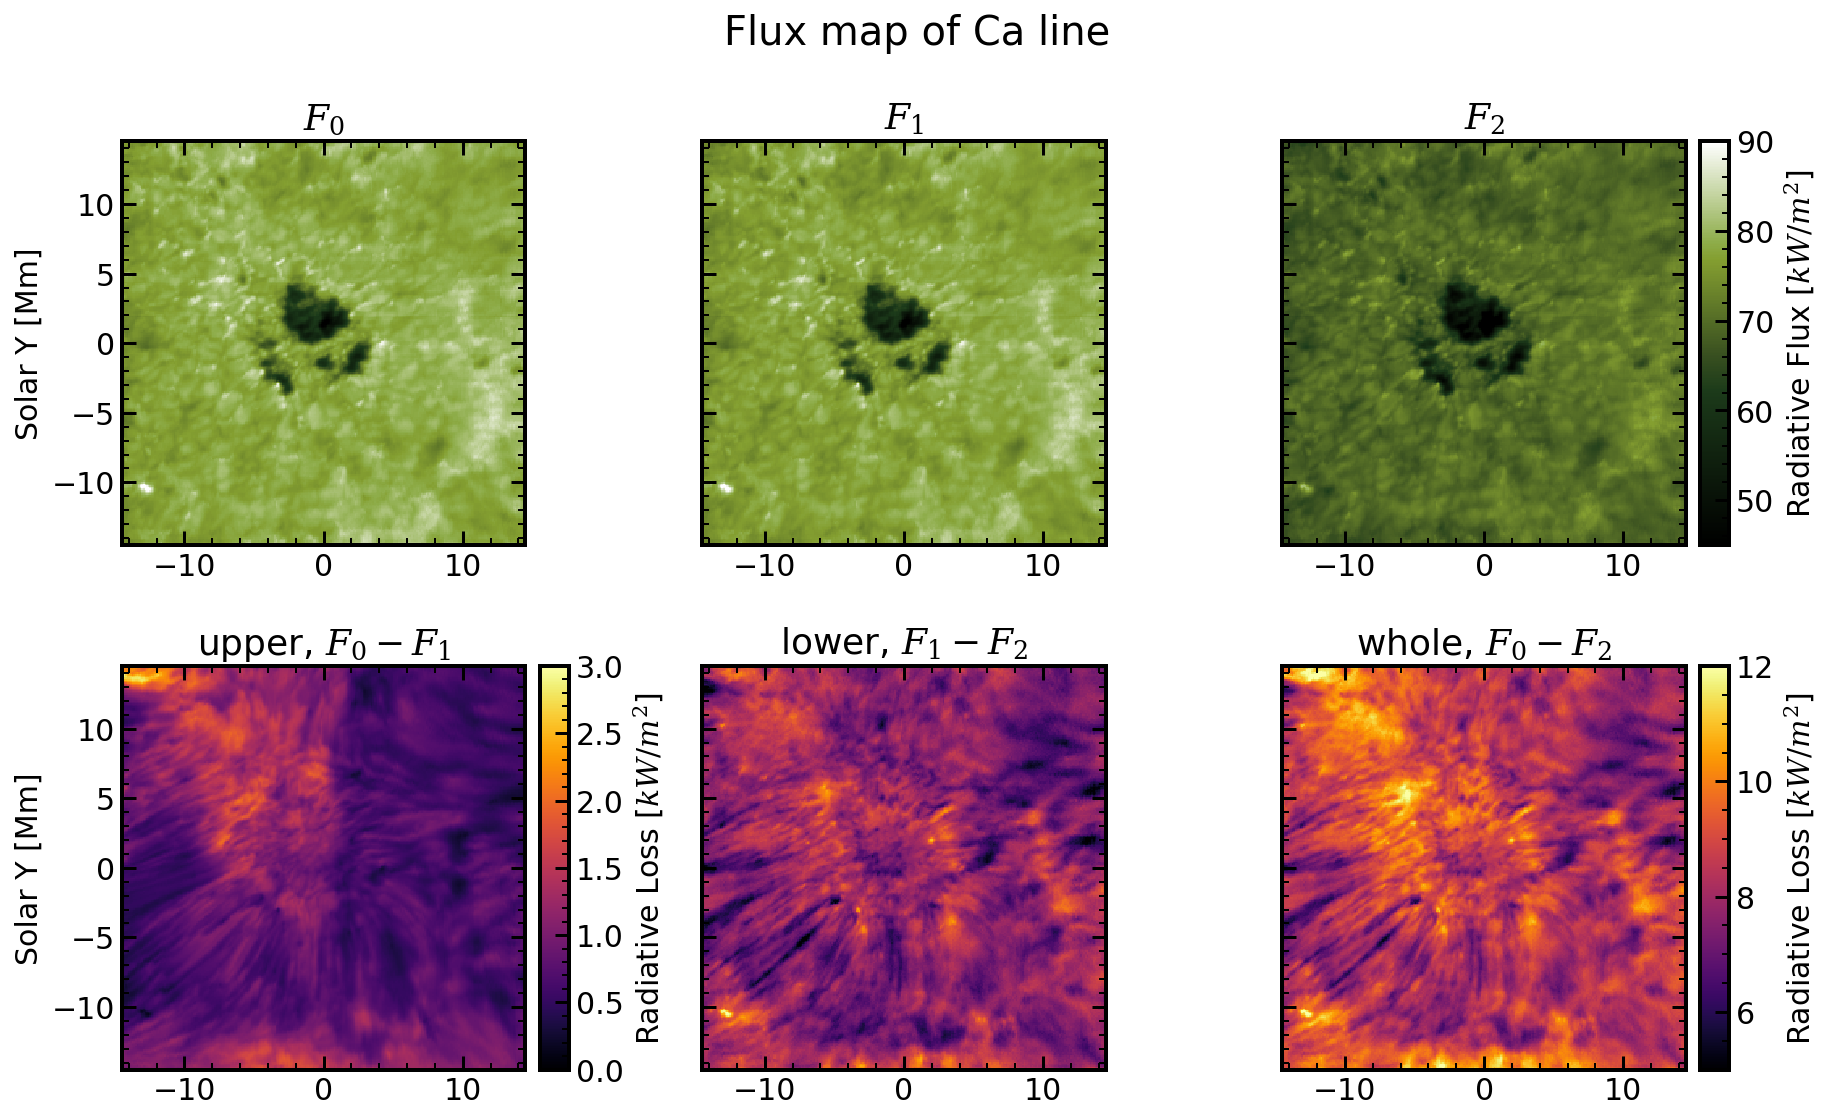

In [26]:
flux_map_plot(flux_Ca, line='Ca', which='both')

# QS - 2017.06.14

In [30]:
# LOAD FLUX RESULTS
flux_path = '/data/home/sskang/Documents/Data/FISS_20170614_QS_/flux'

flux_Ha = '/FR_20170614_171833_Ha.npy'
flux_Ca = '/FR_20170614_171833_Ca.npy'

flux_Ha, flux_Ca = flux_path + flux_Ha, flux_path + flux_Ca

flux_Ha = np.load(flux_Ha)
flux_Ca = np.load(flux_Ca)

In [31]:
print(flux_Ha.shape, flux_Ca.shape)

(3, 250, 150) (3, 250, 150)


In [ ]:
# import a FISS file and its corresponding parameters file.
db = None
Initialized = False

# Active Region
fiss_path = '/data/home/sskang/Documents/Data/FISS_20130717_AR_/fiss_data'
pars_path = '/data/home/sskang/Documents/Data/FISS_20130717_AR_/pars'

fHa = '/FISS_20130717_185221_A1_c.fts'
fCa = '/FISS_20130717_185222_B1_c.fts'
fHapars = '/FISS_20130717_185221_A1_par.fts'
fCapars = '/FISS_20130717_185222_B1_par.fts'

# Quiet Sun
fiss_path = '/data/home/sskang/Documents/Data/FISS_20170614_QS_/fiss_data'
pars_path = '/data/home/sskang/Documents/Data/FISS_20170614_QS_/pars'

fHa = '/FISS_20170614_171833_A1_c.fts'
fCa = '/FISS_20170614_171833_B1_c.fts'
fHapars = '/FISS_20170614_171833_A1_par.fts'
fCapars = '/FISS_20170614_171833_B1_par.fts'

fHa, fCa = fiss_path + fHa, fiss_path + fCa
fHapars, fCapars = pars_path + fHapars, pars_path + fCapars
print(fHa, fCa)
print(fHapars, fCapars)

if (db is None) and not Initialized:
    fissHa = FISS(fHa, absScale=False)   # 6562.82
    fissCa = FISS(fCa, absScale=False)   # 8542.09
    
    fissHa.data = np.flip(fissHa.data,1)
    fissCa.data = np.flip(fissCa.data,1)
    
    icont = fissHa.data[:,:,50]
    qs = icont > (icont.max()*0.7)
    fissHa.refProfile = fissHa.data[qs,:].mean(0)
    icont = fissCa.data[:,:, 50]
    qs = icont > (icont.max()*0.7)
    fissCa.refProfile = fissCa.data[qs,:].mean(0)
    
    del icont, qs
    Initialized = True

Fitted = True
if Fitted:
    db = fissDB(fissHa, fissCa, Aparfile=fHapars, Bparfile=fCapars)
else:
    db = fissDB(fissHa, fissCa)

## Ha line

### histogram

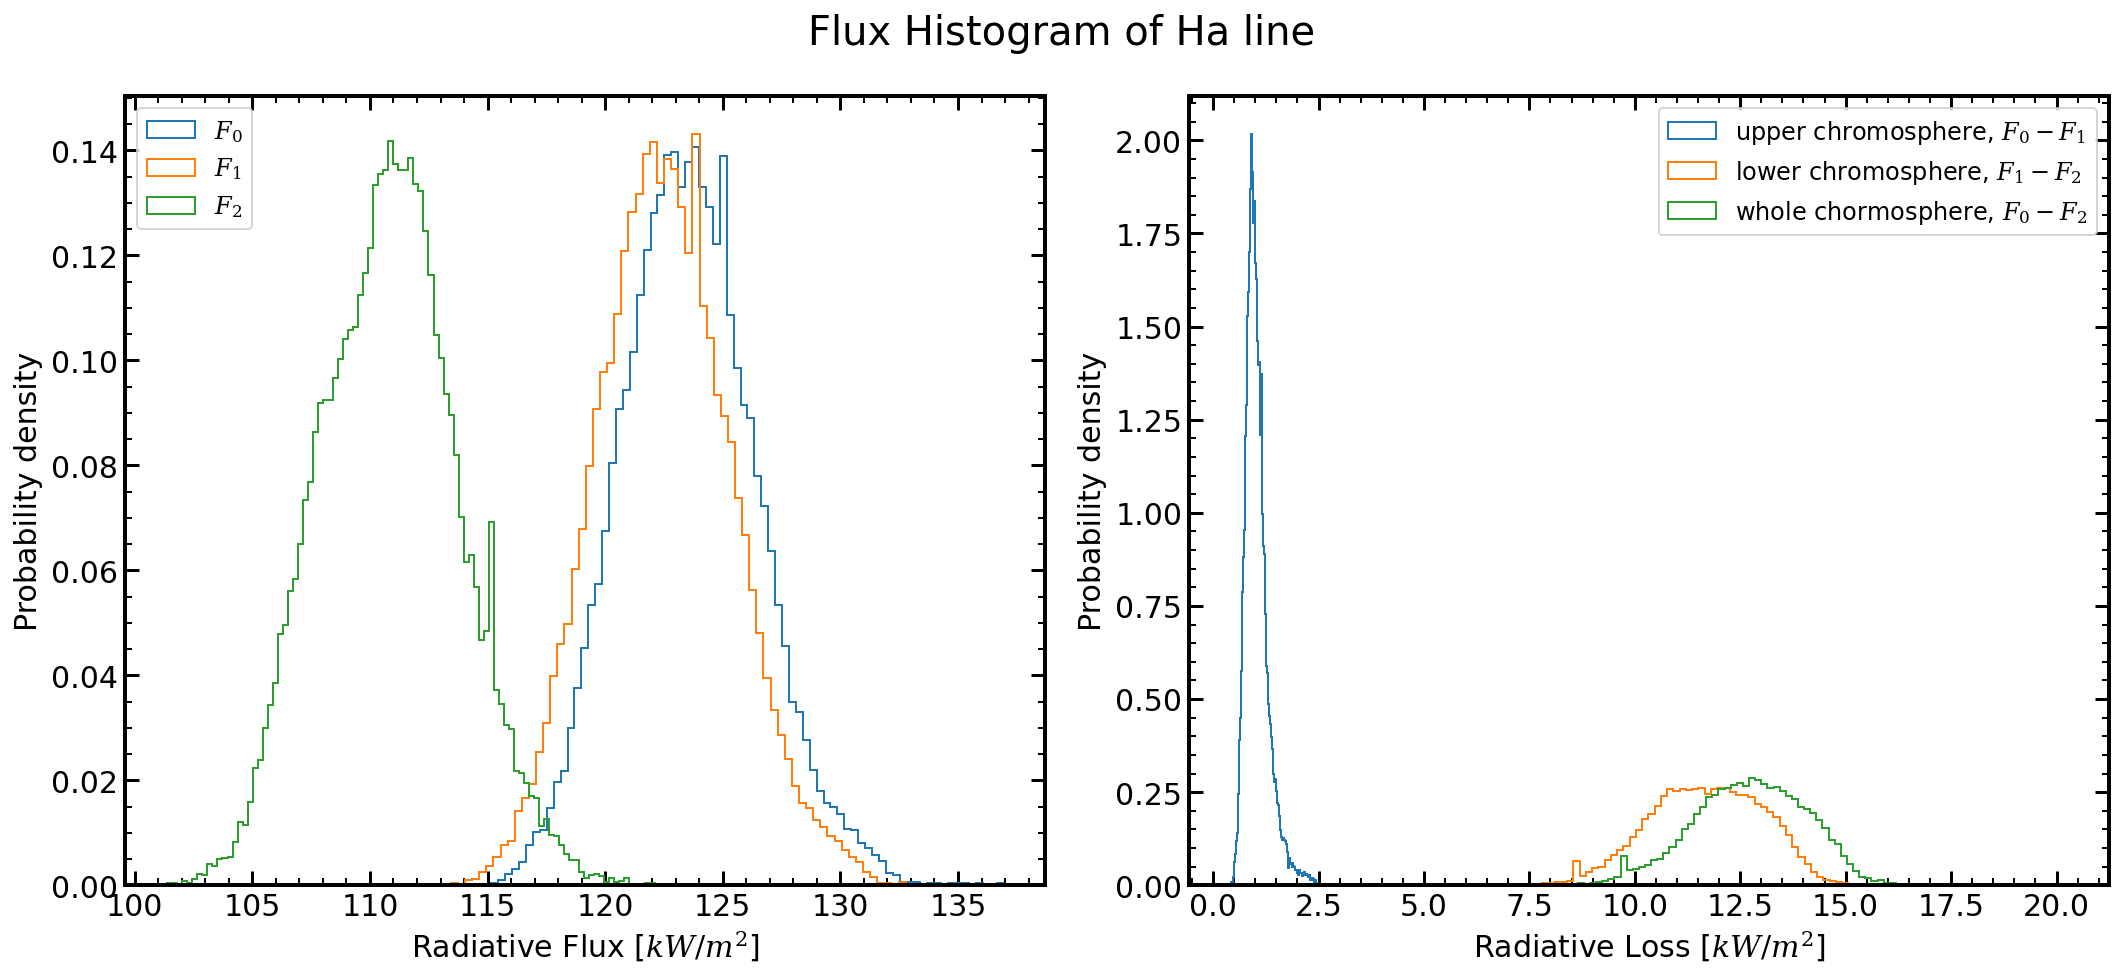

In [32]:
flux_hist_plot(flux_Ha, line='Ha')

### map

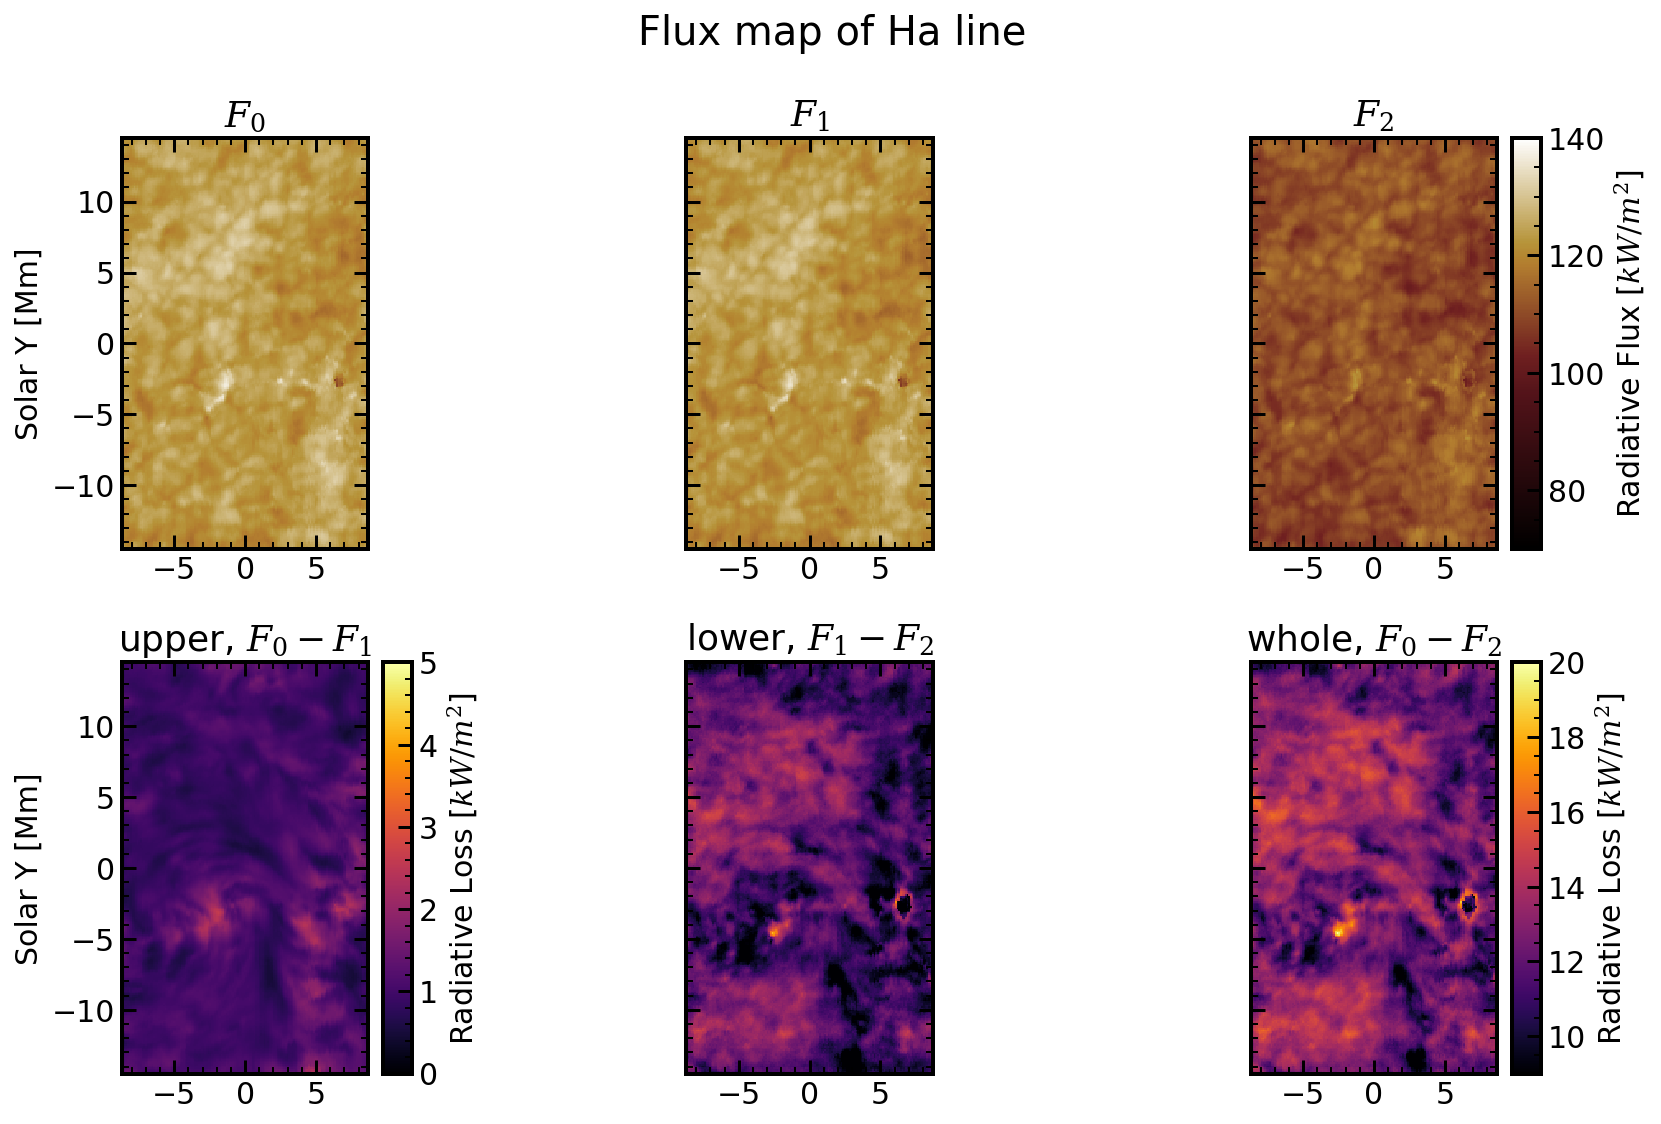

In [34]:
flux_map_plot(flux_Ha, line='Ha', which='both')

## Ca II line

### histogram

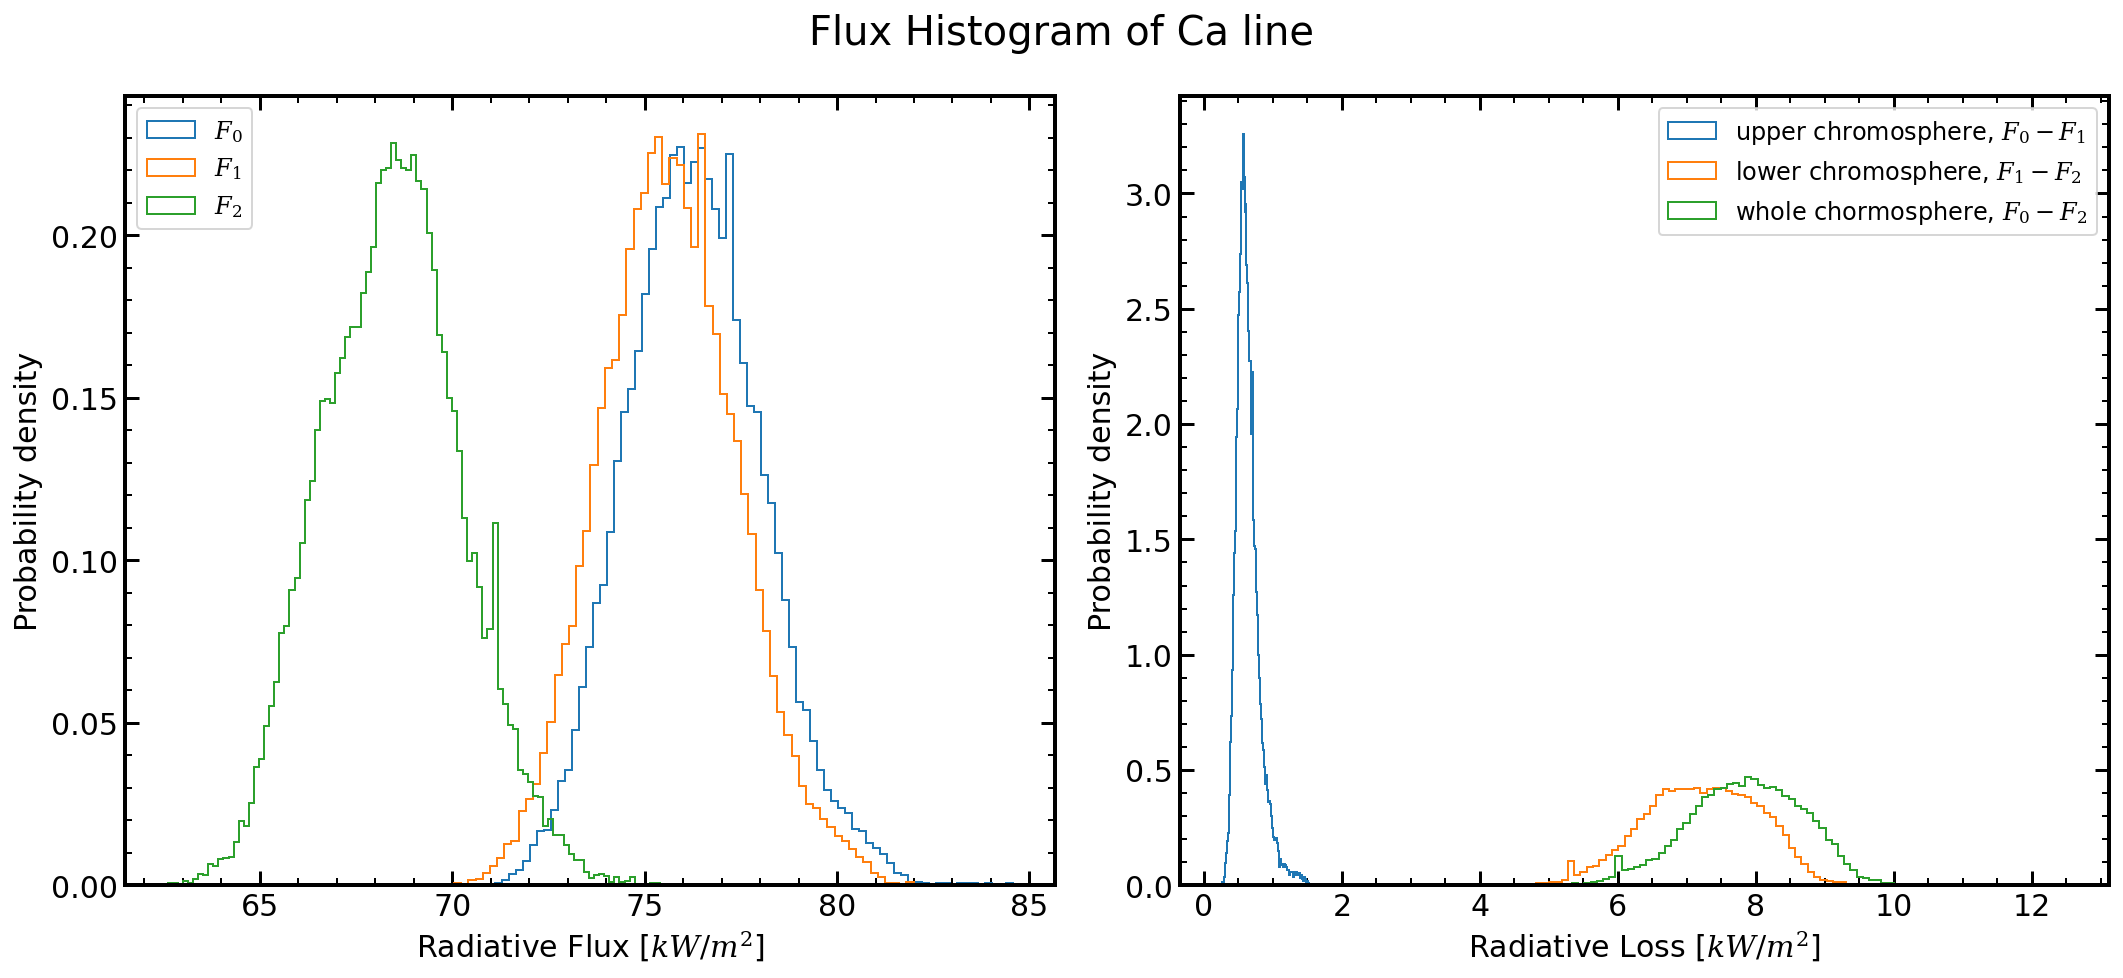

In [33]:
flux_hist_plot(flux_Ca, line='Ca')

### map

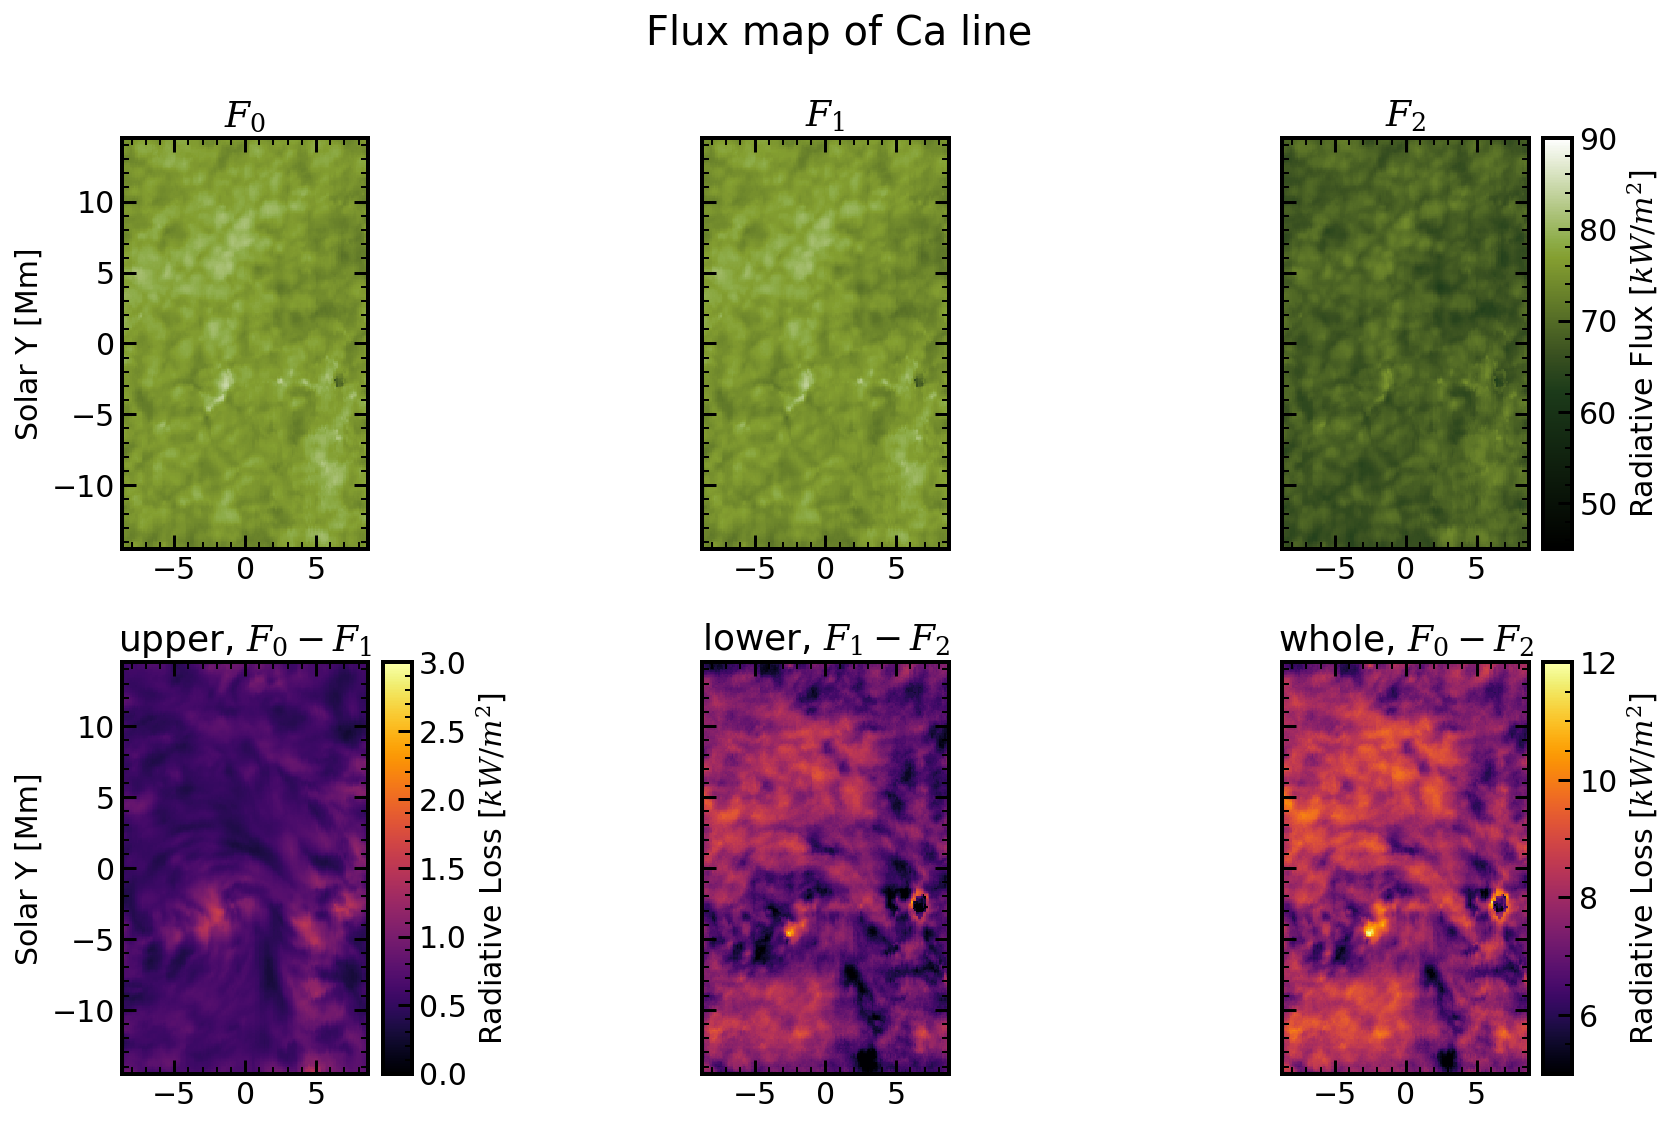

In [36]:
flux_map_plot(flux_Ca, line='Ca', which='both')

# Plotting Functions

## flux_hist_plot

In [4]:
def flux_hist_plot(flux, line='Ha', save=False):
    fig, ax = plt.subplots(1,2, figsize=(15,7))

    nlayer, nx, ny = flux.shape
    hist_kwargs = {'bins':100, 'histtype':'step', 'density':True}

    for i in range(nlayer):
        ax[0].hist(flux[i,:,:].reshape(-1), **hist_kwargs, label=rf'$F_{i}$')
        
    ax[0].set(xlabel=r'Radiative Flux [$kW/m^2$]', ylabel='Probability density')
    ax[0].legend()

    ax[1].hist((flux[0,:,:]-flux[1,:,:]).reshape(-1), label=r'upper chromosphere, $F_0-F_1$', **hist_kwargs)
    ax[1].hist((flux[1,:,:]-flux[2,:,:]).reshape(-1), label=r'lower chromosphere, $F_1-F_2$', **hist_kwargs)
    ax[1].hist((flux[0,:,:]-flux[2,:,:]).reshape(-1), label=r'whole chormosphere, $F_0-F_2$', **hist_kwargs)

    ax[1].set(xlabel=r'Radiative Loss [$kW/m^2$]', ylabel='Probability density')
    ax[1].legend()

    fig.suptitle(f'Flux Histogram of {line} line', fontsize=20)
    plt.tight_layout()
    
    if save:
        plt.savefig(f'Flux_hist_{line}_{save}.png', dpi=300)
        plt.close(fig)
    else:
        plt.show()

## flux_map_plot

In [5]:
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

### ver.1

In [24]:
def flux_map_plot(flux, line='Ha', vbin=None, cmap=None, which='both', save=False):
    # figure configuration
    if which=='both':
        fig, ax = plt.subplots(2,3, figsize=(13,8))
    elif which=='flux' or which=='diff' :
        fig, ax = plt.subplots(1,3, figsize=(13,4))
    else:
        raise NameError('Wrong map inputted!')
    
    # extent: pixel to physical dimesion conversion [Mm]
    nlayer, ny, nx  = flux.shape
    extent = np.array([-nx/2., nx/2., -ny/2., ny/2.])*0.16*0.725
    
    # set the colormap
    if cmap is None:
        if line=='Ha':
            cmap = fisscmap.ha
        elif line=='Ca':
            cmap = fisscmap.ca
    
    # set the colorbar range
    if vbin is None:
        if line=='Ha':
            vbin = [(70, 140), (0,5), (9,20)]
        elif line=='Ca':
            vbin = [(45, 90), (0,3), (5,12)]
    
    # keywarguments
    fm_kwargs = {'cmap':cmap, 'norm':colors.Normalize(vmin=vbin[0][0], vmax=vbin[0][1]), 
                  'interpolation':'nearest', 'extent':extent, 'origin':'lower'}
    fdm1_kwargs = {'cmap':'inferno', 'norm':colors.Normalize(vmin=vbin[1][0], vmax=vbin[1][1]), 
                  'interpolation':'nearest', 'extent':extent, 'origin':'lower'}
    fdm2_kwargs = {'cmap':'inferno', 'norm':colors.Normalize(vmin=vbin[2][0], vmax=vbin[2][1]), 
                  'interpolation':'nearest', 'extent':extent, 'origin':'lower'}
    
    # flux map
    if which=='both':
        axes = ax[0,:]
    elif which=='flux':
        axes = ax
        
    if which=='both' or which=='flux':
        for i in range(nlayer):
            im = axes[i].imshow(flux[i,:,:], **fm_kwargs)
        
            divider = make_axes_locatable(axes[i])
            cax = divider.append_axes('right', size=0.2, pad=0.1)
            cb = fig.colorbar(im, cax=cax)
            cb.set_label(r'Radiative Flux [$kW/m^2$]')
            if i!=2:
                 cb.remove()
    
        axes[0].set(title=r'$F_0$', ylabel='Solar Y [Mm]')
        axes[1].set(title=r'$F_1$')
        axes[2].set(title=r'$F_2$')
    
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[2].get_yticklabels(), visible=False)
    
    # flux difference map
    if which=='both':
        axes = ax[1,:]
    elif which=='diff':
        axes = ax
    
    if which=='both' or which=='diff':
        for i in range(nlayer):
            if i==0:
                fdm_kwargs = fdm1_kwargs
            else:
                fdm_kwargs = fdm2_kwargs
            top, bot = i%2, (i+1)//2+1
            im = axes[i].imshow(flux[top,:,:]-flux[bot,:,:], **fdm_kwargs)
        
            divider = make_axes_locatable(axes[i])
            cax = divider.append_axes('right', size=0.2, pad=0.1)
            cb = fig.colorbar(im, cax=cax)
            cb.set_label(r'Radiative Loss [$kW/m^2$]')
            if i==1:
                cb.remove()
    
        axes[0].set(title=r'upper, $F_0-F_1$', ylabel='Solar Y [Mm]')
        axes[1].set(title=r'lower, $F_1-F_2$')
        axes[2].set(title=r'whole, $F_0-F_2$')
    
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[2].get_yticklabels(), visible=False)
    
    fig.suptitle(f'Flux map of {line} line', fontsize=20)
    plt.tight_layout()
    
    if save:
        plt.savefig(f'Flux_map_20170614/flux_map_{line}_{save}.png', dpi=300)
        plt.close(fig)
    else:
        plt.show()

### ver.2

In [199]:
def flux_map_plot(flux, line='Ha', vbin=None, save=False):
    # figure configuration
    fig = plt.figure(figsize=(17,12), constrained_layout=True)
    gs = fig.add_gridspec(2,1)
    gs0 = gs[0].subgridspec(1,4, width_ratios=[1,1,1,0.05])
    gs1 = gs[1].subgridspec(1,5, width_ratios=[1,0.05,1,1,0.05])
    
    ax0 = [fig.add_subplot(gs0[i]) for i in range(4)]
    ax1 = [fig.add_subplot(gs1[i]) for i in range(5)]
    
    # extent: pixel to physical dimesion conversion [Mm]
    nlayer, ny, nx  = flux.shape
    extent = np.array([-nx/2., nx/2., -ny/2., ny/2.])*0.16*0.725
    
    # set the colorbar range
    if vbin is None:
        if line == 'Ha':
            vbin = [(100, 140), (0,5), (8,20)]
        elif line == 'Ca':
            vbin = [(60, 90), (0,12), (0,12)]
    
    # flux map
    fm_kwargs = {'cmap':'inferno', 'norm':colors.Normalize(vmin=vbin[0][0], vmax=vbin[0][1]), 
                  'interpolation':'nearest', 'extent':extent, 'origin':'lower'}
    
    for i in range(nlayer):
        im = ax0[i].imshow(flux[i,:,:], **fm_kwargs)
    
    ax0[0].set(title=r'$F_0$', xlabel='Solar X [Mm]', ylabel='Solar Y [Mm]')
    ax0[1].set(title=r'$F_1$')
    ax0[2].set(title=r'$F_2$')
    
    plt.setp(ax0[1].get_yticklabels(), visible=False)
    plt.setp(ax0[2].get_yticklabels(), visible=False)
    
    cb = fig.colorbar(im, cax=ax0[3])
    cb.set_label(r'Radiative Flux [$kW/m^2$]')
    
    # flux difference map
    fdm_kwargs = {'cmap':'inferno', 'norm':colors.Normalize(vmin=vbin[1][0], vmax=vbin[1][1]), 
                  'interpolation':'nearest', 'extent':extent, 'origin':'lower'}
    
    im1 = ax1[0].imshow(flux[0,:,:]-flux[1,:,:], **fdm_kwargs)
    
    cb1 = fig.colorbar(im1, cax=ax1[1])
    cb1.set_label(r'Radiative Cooling [$kW/m^2$]')
    
    fdm_kwargs = {'cmap':'inferno', 'norm':colors.Normalize(vmin=vbin[2][0], vmax=vbin[2][1]), 
                  'interpolation':'nearest', 'extent':extent, 'origin':'lower'}
    ax1[2].imshow(flux[1,:,:]-flux[2,:,:], **fdm_kwargs)
    im2 = ax1[3].imshow(flux[0,:,:]-flux[2,:,:], **fdm_kwargs)
    
    cb2 = fig.colorbar(im2, cax=ax1[4])
    cb2.set_label(r'Radiative Cooling [$kW/m^2$]')
    
    ax1[0].set(title=r'upper: $F_0-F_1$', xlabel='Solar X [Mm]', ylabel='Solar Y [Mm]')
    ax1[2].set(title=r'lower: $F_1-F_2$')
    ax1[3].set(title=r'whole: $F_0-F_2$')
    
    plt.setp(ax1[2].get_yticklabels(), visible=False)
    plt.setp(ax1[3].get_yticklabels(), visible=False)
    
    fig.suptitle(f'Flux map of {line} line', fontsize=20)
    #plt.tight_layout()
    
    if save:
        plt.savefig(f'Flux_map_20170614/flux_map_{line}_{save}.png', dpi=300)
        plt.close(fig)
    else:
        plt.show()

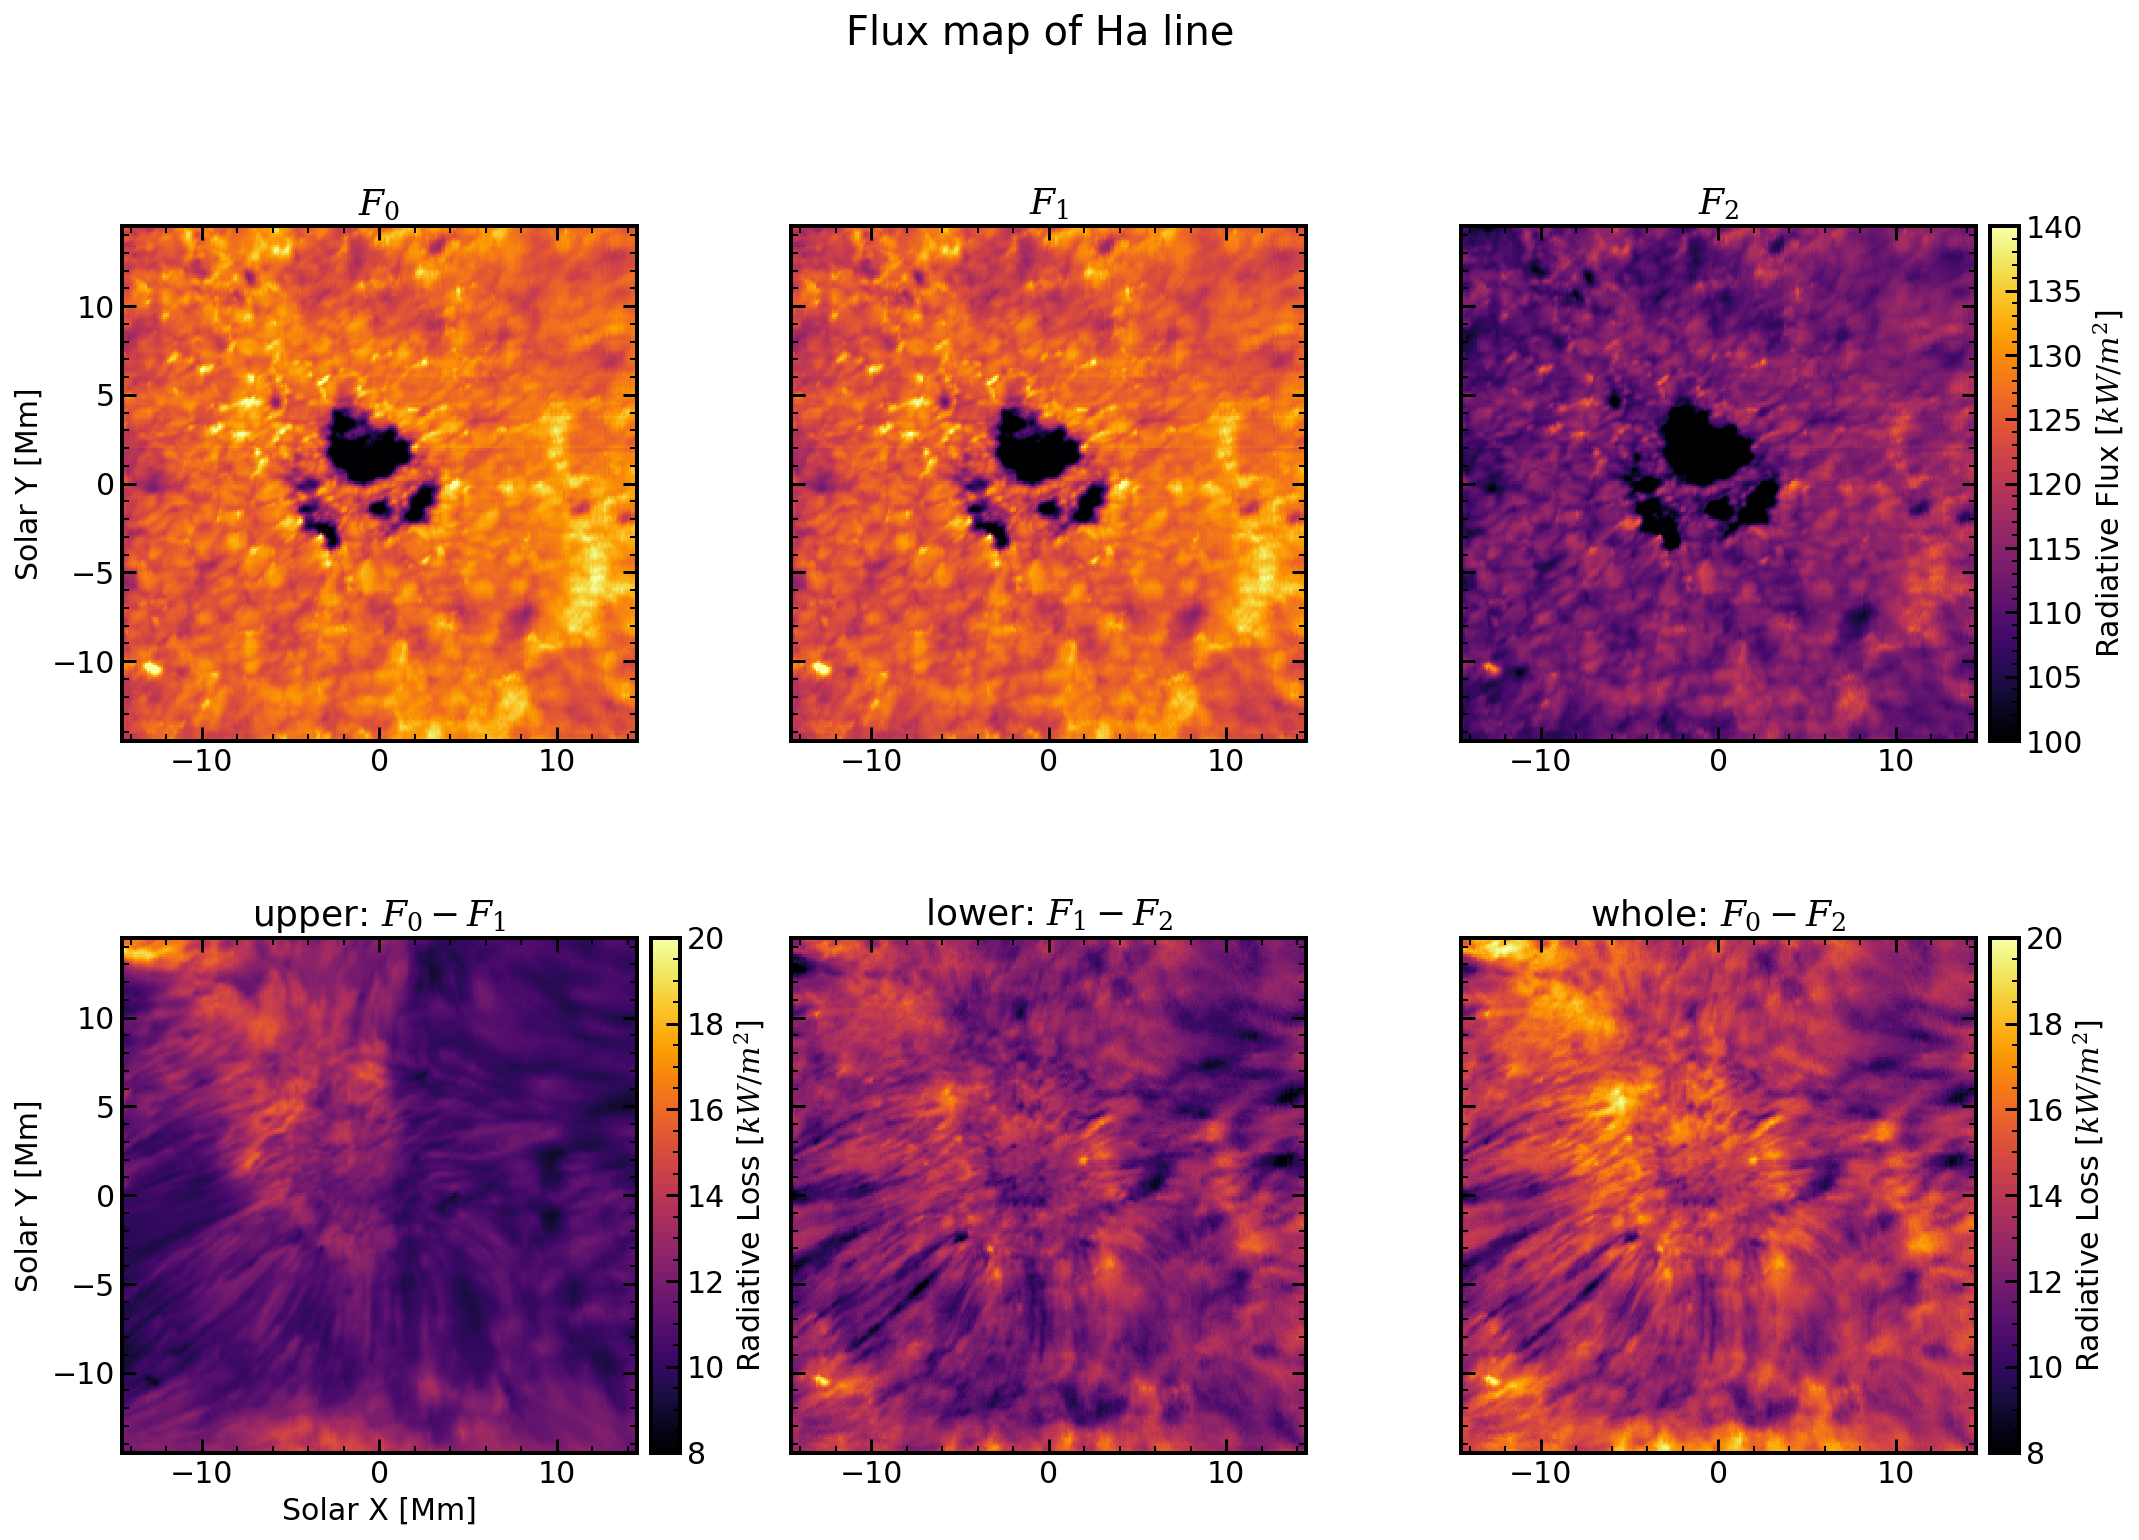

In [210]:
flux_map_plot(flux_Ha, line='Ha')

## invpar_hist_plot

In [ ]:
def invpar_hist_plot(pars, save=False):
    pass

## invpar_map_plot

In [ ]:
def invpar_map_plot(pars, save=False):
    pass